In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

In [2]:
# Step 1: Load the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 88s 1us/step


In [3]:
# Step 2: Define the Model (using MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

C:\Users\madug\AppData\Local\Temp\ipykernel_12084\760522860.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


In [4]:
# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 59ms/step - accuracy: 0.2461 - loss: 2.1407 - val_accuracy: 0.2989 - val_loss: 1.9628
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.3081 - loss: 1.9452 - val_accuracy: 0.3086 - val_loss: 1.9225
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3184 - loss: 1.9044 - val_accuracy: 0.3098 - val_loss: 1.9078
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.3181 - loss: 1.8969 - val_accuracy: 0.3132 - val_loss: 1.9010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3228 - loss: 1.8818 - val_accuracy: 0.3135 - val_loss: 1.8979
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3212 - loss: 1.8800 - val_accuracy: 0.3170 - val_loss: 1.8967
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3204 - loss: 1.8774 - val_accuracy: 0.3149 - val_loss: 1.8951
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.3220 

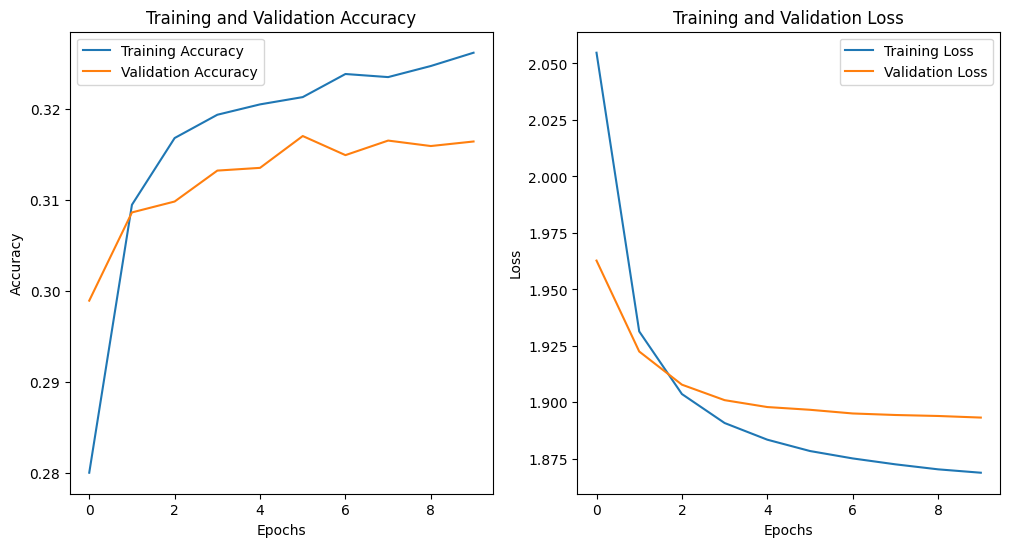

In [6]:
# Step 5: Plot the Training and Validation Accuracy and Loss
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot results
plot_history(history)


In [7]:
# Step 6: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 13s - 40ms/step - accuracy: 0.3164 - loss: 1.8933
Test Accuracy: 31.64%
